In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
base = 'satelite_data'

if not os.path.exists(base):
    os.makedirs(base)

In [ ]:
# !gdown --id 1vY_eijK2ARUMTzVG6hGGrFom1B91c4bX -O {base}/merged_data.csv
!gdown --id 1yN0ln0NJi0-cBD6xTsUJrOIlmm57Dc9Q -O {base}/dataset.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yN0ln0NJi0-cBD6xTsUJrOIlmm57Dc9Q
To: /content/satelite_data/dataset.csv
100% 2.39M/2.39M [00:00<00:00, 128MB/s]


In [ ]:
data = pd.read_csv(os.path.join(base, 'dataset.csv'))
data

,location,B2_2024-01,B2_2024-02,B2_2024-03,B2_2024-04,B2_2024-05,B2_2024-06,B2_2024-07,B2_2024-08,B2_2024-09,...,VV_ent_2024-04,VV_ent_2024-05,VV_ent_2024-06,VV_ent_2024-07,VV_ent_2024-08,VV_ent_2024-09,VV_ent_2024-10,VV_ent_2024-11,VV_ent_2024-12,class
0,Location_1,392.0,642.0,1510.5,2986.0,455.0,408.0,750.5,615.5,662.0,...,5.238523,5.266343,5.249825,5.247753,5.236627,5.261103,5.271101,5.261828,5.243223,tebu
1,Location_10,466.5,586.5,356.5,817.5,434.0,329.0,473.5,488.5,745.5,...,5.279375,5.290195,5.262574,5.261156,5.245557,5.273984,5.253889,5.266538,5.273718,tebu
2,Location_100,885.0,506.5,661.0,476.0,490.5,1286.0,419.0,1205.0,321.0,...,5.262306,5.260171,5.252504,5.254760,5.281956,5.247375,5.267330,5.235875,5.291425,tebu
3,Location_101,1031.0,622.0,2175.5,530.0,512.5,832.0,686.5,1559.5,805.0,...,5.290820,5.281692,5.280640,5.274906,5.293938,5.282001,5.287665,5.255166,5.283386,tebu
4,Location_102,1895.0,742.5,443.0,426.0,611.0,444.0,518.5,1199.0,531.0,...,5.279391,5.285950,5.269042,5.267692,5.256470,5.264337,5.274964,5.274470,5.271800,tebu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,Location_87,724.5,489.5,570.5,499.5,648.0,595.5,435.5,757.0,973.5,...,5.239265,5.252907,5.280079,5.276531,5.264420,5.259160,5.273824,5.253396,5.252046,others
815,Location_88,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
816,Location_89,1296.0,767.0,419.0,444.5,548.5,664.5,722.0,988.0,1885.0,...,5.279066,5.274812,5.288281,5.277521,5.272784,5.270111,5.292791,5.276701,5.278095,others
817,Location_9,1224.5,372.0,490.0,2699.0,1176.5,495.0,460.5,646.0,475.0,...,5.277642,5.254273,5.275746,5.278970,5.280733,5.281858,5.266729,5.268897,5.274100,others


In [ ]:
data.drop('location', axis=1, inplace=True)

In [ ]:
# # Buat daftar nama kolom baru
# new_column_names = []

# new_column_names.append('Class')

# # 1. Sentinel-2 Bands (B2 - B8A, masing-masing 12 bulan)
# for band in ["B2", "B3", "B4", "B5", "B6", "B7", "B8", "B8A"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{band}_{month}")

# # 2. NDVI & NDWI (masing-masing 12 bulan)
# for index in ["NDVI", "NDWI"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{index}_{month}")

# # 3. Sentinel-1 VV & VH (masing-masing 12 bulan)
# for radar in ["VV", "VH"]:
#     for month in range(1, 13):  # 12 bulan
#         new_column_names.append(f"{radar}_{month}")

# # 4. CHIRPS (12 bulan)
# for month in range(1, 13):  # 12 bulan
#     new_column_names.append(f"CHIRPS_{month}")

# # 5. Terrain (Elevation, Slope, Aspect)
# new_column_names.extend(["Elevation", "Slope", "Aspect"])

# # 6. Statistik VV & VH
# # VV (10 statistik)
# for stat in ["Mean", "Median", "StdDev", "CoV", "Min", "Max", "Range", "IQR", "Skewness", "Kurtosis"]:
#     new_column_names.append(f"VV_{stat}")
# # VH (10 statistik)
# for stat in ["Mean", "Median", "StdDev", "CoV", "Min", "Max", "Range", "IQR", "Skewness", "Kurtosis"]:
#     new_column_names.append(f"VH_{stat}")

# # 7. Entropi VV & VH
# new_column_names.extend(["VV_Entropy", "VH_Entropy"])

# # Validasi jumlah kolom
# if len(data.columns) == len(new_column_names):
#     # Ganti nama kolom
#     data.columns = new_column_names
#     print("Kolom berhasil diganti:")
#     print(data.head())
# else:
#     print(f"Jumlah kolom tidak sesuai: {len(data.columns)} kolom dalam file vs {len(new_column_names)} nama kolom.")

Kolom berhasil diganti:
   Class      B2_1      B2_2      B2_3      B2_4      B2_5      B2_6  \
0      4  0.051166  0.066034  0.063299  0.162909  0.173840  0.103043   
1      4  0.041163  0.073449  0.084577  0.097461  0.093803  0.045156   
2      3  0.072416  0.129937  0.134894  0.097134  0.072244  0.057077   
3      3  0.074673  0.111059  0.101137  0.076099  0.066573  0.047397   
4      3  0.072276  0.119697  0.113054  0.085009  0.063719  0.042546   

       B2_7      B2_8      B2_9  ...  VH_StdDev    VH_CoV     VH_Min  \
0  0.014811  0.038940  0.054497  ...   0.935761 -0.089926 -11.703547   
1  0.029049  0.014436  0.127593  ...   1.269115 -0.145843 -11.510554   
2  0.070750  0.059574  0.075071  ...   1.244691 -0.129092 -11.651522   
3  0.071096  0.087114  0.106630  ...   1.828652 -0.176416 -12.470089   
4  0.047473  0.063731  0.077336  ...   1.314358 -0.124873 -12.745337   

     VH_Max  VH_Range    VH_IQR  VH_Skewness  VH_Kurtosis  VV_Entropy  \
0 -8.832947  2.870600  1.344082     0

In [ ]:
data['class'].value_counts()

,count
class,
others,338
jagung,219
padi,160
tebu,102


In [ ]:
data.isnull().sum()

,0
B2_2024-01,0
B2_2024-02,0
B2_2024-03,0
B2_2024-04,0
B2_2024-05,0
...,...
VV_ent_2024-09,0
VV_ent_2024-10,0
VV_ent_2024-11,0
VV_ent_2024-12,0


In [ ]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

,Class,B2_1,B2_2,B2_3,B2_4,B2_5,B2_6,B2_7,B2_8,B2_9,...,VH_StdDev,VH_CoV,VH_Min,VH_Max,VH_Range,VH_IQR,VH_Skewness,VH_Kurtosis,VV_Entropy,VH_Entropy
582,2,0.061727,0.143991,0.158063,0.118837,0.040936,0.120746,0.145390,0.103920,0.009234,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
583,1,0.031417,0.117331,0.157603,0.126097,0.113843,0.119934,0.104889,0.046340,0.050570,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
584,2,0.029151,0.118097,0.150104,0.110717,0.031280,0.024119,0.041059,0.044261,0.034881,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
587,2,0.053074,0.103353,0.125046,0.109744,0.053091,0.072109,0.066631,0.054240,0.031524,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
590,1,0.026129,0.151436,0.194071,0.156793,0.048899,0.041306,0.031984,0.040759,0.049030,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,0.055288,0.045549,0.060027,0.077577,0.068433,0.070609,0.067287,0.074149,0.065013,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
857,4,0.064559,0.039566,0.130101,0.177457,0.139736,0.107804,0.123419,0.119263,0.042203,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
858,1,0.072630,0.042580,0.067380,0.106617,0.099617,0.144066,0.149209,0.123754,0.036281,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
859,1,0.130804,0.634383,0.385126,0.133334,0.253594,0.356570,0.278194,0.122233,0.052809,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
null_rows['Class'].value_counts()

,count
Class,
4,49
1,24
2,23
3,20


<Figure size 400x600 with 0 Axes>

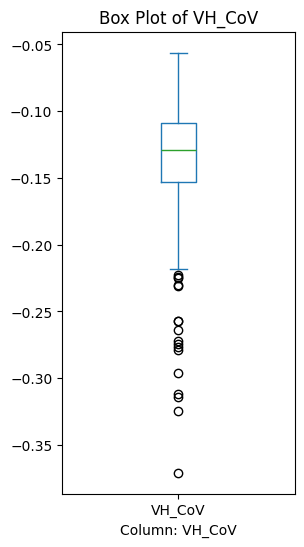

<Figure size 400x600 with 0 Axes>

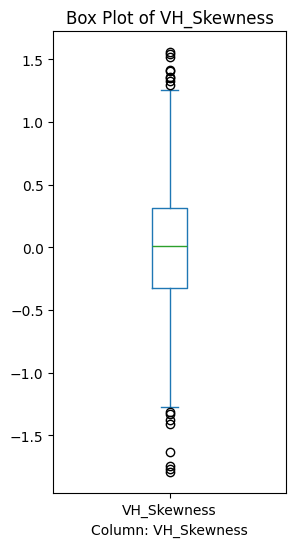

<Figure size 400x600 with 0 Axes>

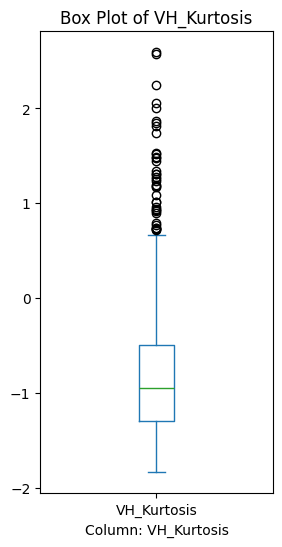

<Figure size 400x600 with 0 Axes>

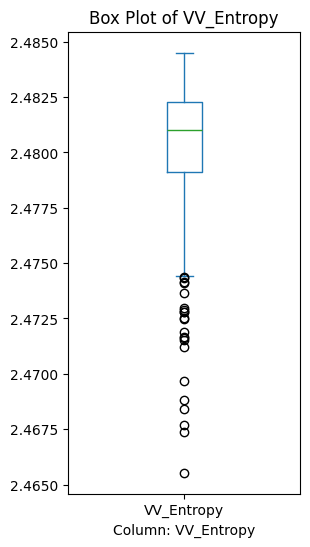

<Figure size 400x600 with 0 Axes>

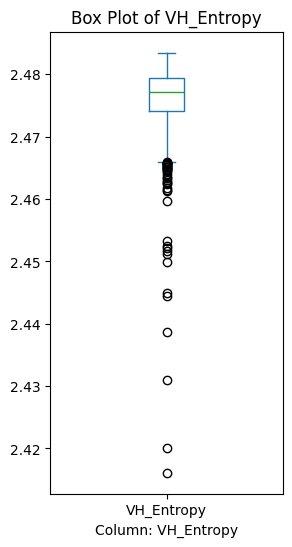

In [ ]:
# prompt: # prompt: create blox plot for column v176, v181-v184. ONE COLUMN ONE BOXPLOT PICTURE

import matplotlib.pyplot as plt
columns_to_plot = ['VH_CoV', 'VH_Skewness', 'VH_Kurtosis', 'VV_Entropy', 'VH_Entropy']

for column in columns_to_plot:
    plt.figure(figsize=(4, 6))  # Adjust figure size as needed
    data[[column]].plot(kind='box', figsize=(3, 6))
    plt.xlabel('Column: ' + column)
    plt.title('Box Plot of ' + column)
    plt.show()

In [ ]:
data2 = data.iloc[:, :160]
data2

,Class,B2_1,B2_2,B2_3,B2_4,B2_5,B2_6,B2_7,B2_8,B2_9,...,CHIRPS_6,CHIRPS_7,CHIRPS_8,CHIRPS_9,CHIRPS_10,CHIRPS_11,CHIRPS_12,Elevation,Slope,Aspect
0,4,0.051166,0.066034,0.063299,0.162909,0.173840,0.103043,0.014811,0.038940,0.054497,...,307.964020,43.823212,62.725243,67.584412,23.239996,43.667736,71.928986,631.358032,6.309601,207.099808
1,4,0.041163,0.073449,0.084577,0.097461,0.093803,0.045156,0.029049,0.014436,0.127593,...,307.023468,43.670223,62.498596,66.907486,23.004637,43.002167,72.083496,603.584717,3.693184,221.647736
2,3,0.072416,0.129937,0.134894,0.097134,0.072244,0.057077,0.070750,0.059574,0.075071,...,342.663818,53.799206,62.489380,64.247444,23.718750,35.917000,85.039604,226.568558,0.981805,156.194702
3,3,0.074673,0.111059,0.101137,0.076099,0.066573,0.047397,0.071096,0.087114,0.106630,...,344.415222,54.052803,62.672638,64.158440,23.816597,35.850735,85.465752,216.750778,3.418721,171.465088
4,3,0.072276,0.119697,0.113054,0.085009,0.063719,0.042546,0.047473,0.063731,0.077336,...,345.402649,54.517178,62.295345,64.031570,23.869387,36.002258,85.675186,219.514770,1.615377,187.262741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4,0.093036,0.113154,0.100619,0.087097,0.074813,0.069877,0.115161,0.145883,0.150109,...,301.732544,39.466839,63.875282,63.035297,23.843746,41.011051,71.821793,428.755493,0.972275,203.319458
894,1,0.094410,0.173460,0.105660,0.048029,0.063841,0.072854,0.069944,0.064209,0.061489,...,301.365204,39.520184,64.003532,63.011665,23.817074,40.667206,72.111183,423.158295,0.634919,86.060112
895,1,0.043085,0.242560,0.368210,0.318800,0.159197,0.119543,0.095403,0.055606,0.046920,...,300.815613,39.470562,64.123474,62.841324,23.757442,40.213089,72.433029,407.889679,1.343018,209.148941
896,4,0.056129,0.348386,0.324371,0.177077,0.062789,0.109074,0.094449,0.054160,0.012397,...,300.526276,39.687252,64.317902,62.985603,23.769472,39.759945,72.853134,402.895019,1.404565,93.330200


In [ ]:
VV_columns = [col for col in data2.columns if col.startswith("VV")]
VH_columns = [col for col in data2.columns if col.startswith("VH")]

In [ ]:
from scipy.stats import skew, kurtosis
from skimage.measure import shannon_entropy

data2["VV_mean"] = data2[VV_columns].mean(axis=1)  # Rata-rata (mean)
data2["VV_median"] = data2[VV_columns].median(axis=1)  # Median
data2["VV_std"] = data2[VV_columns].std(axis=1)  # Standar deviasi
data2["VV_cov"] = data2[VV_columns].std(axis=1) / data2[VV_columns].mean(axis=1)  # Koefisien variasi (cov)
data2["VV_min"] = data2[VV_columns].min(axis=1)  # Nilai minimum
data2["VV_max"] = data2[VV_columns].max(axis=1)  # Nilai maksimum
data2["VV_range"] = data2["VV_max"] - data2["VV_min"]  # Rentang nilai (range)
data2["VV_iqr"] = data2[VV_columns].quantile(0.75, axis=1) - data2[VV_columns].quantile(0.25, axis=1)  # Interquartile range (IQR)
data2["VV_skewness"] = data2[VV_columns].apply(lambda row: skew(row, nan_policy="omit"), axis=1)  # Skewness (kemiringan distribusi)
data2["VV_kurtosis"] = data2[VV_columns].apply(lambda row: kurtosis(row, nan_policy="omit"), axis=1)  # Kurtosis (keruncingan distribusi)
data2["VV_entropy"] = data2[VV_columns].apply(lambda row: shannon_entropy(row.values), axis=1)

In [ ]:
data2["VH_mean"] = data2[VH_columns].mean(axis=1)  # Rata-rata (mean)
data2["VH_median"] = data2[VH_columns].median(axis=1)  # Median
data2["VH_std"] = data2[VH_columns].std(axis=1)  # Standar deviasi
data2["VH_cov"] = data2[VH_columns].std(axis=1) / data2[VH_columns].mean(axis=1)  # Koefisien variasi (cov)
data2["VH_min"] = data2[VH_columns].min(axis=1)  # Nilai minimum
data2["VH_max"] = data2[VH_columns].max(axis=1)  # Nilai maksimum
data2["VH_range"] = data2["VH_max"] - data2["VH_min"]  # Rentang nilai (range)
data2["VH_iqr"] = data2[VH_columns].quantile(0.75, axis=1) - data2[VH_columns].quantile(0.25, axis=1)  # Interquartile range (IQR)
data2["VH_skewness"] = data2[VH_columns].apply(lambda row: skew(row, nan_policy="omit"), axis=1)  # Skewness (kemiringan distribusi)
data2["VH_kurtosis"] = data2[VH_columns].apply(lambda row: kurtosis(row, nan_policy="omit"), axis=1)  # Kurtosis (keruncingan distribusi)
data2["VH_entropy"] = data2[VH_columns].apply(lambda row: shannon_entropy(row.values), axis=1)

In [ ]:
data2

,Class,B2_1,B2_2,B2_3,B2_4,B2_5,B2_6,B2_7,B2_8,B2_9,...,VH_median,VH_std,VH_cov,VH_min,VH_max,VH_range,VH_iqr,VH_skewness,VH_kurtosis,VH_entropy
0,4,0.051166,0.066034,0.063299,0.162909,0.173840,0.103043,0.014811,0.038940,0.054497,...,-16.414886,1.464891,-0.088954,-20.288923,-14.883554,5.405369,1.674071,-1.393518,1.918102,3.584963
1,4,0.041163,0.073449,0.084577,0.097461,0.093803,0.045156,0.029049,0.014436,0.127593,...,-14.079934,1.015485,-0.070943,-16.168594,-12.979137,3.189457,1.270927,-0.514167,-0.860135,3.584963
2,3,0.072416,0.129937,0.134894,0.097134,0.072244,0.057077,0.070750,0.059574,0.075071,...,-15.381279,1.630249,-0.107361,-17.357227,-12.947486,4.409741,2.948426,0.033167,-1.391010,3.584963
3,3,0.074673,0.111059,0.101137,0.076099,0.066573,0.047397,0.071096,0.087114,0.106630,...,-16.796113,1.502036,-0.088999,-19.354094,-14.303974,5.050119,2.084222,-0.033074,-0.882760,3.584963
4,3,0.072276,0.119697,0.113054,0.085009,0.063719,0.042546,0.047473,0.063731,0.077336,...,-15.983617,1.292886,-0.080859,-18.481468,-13.801738,4.679730,1.669744,-0.287411,-0.448750,3.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4,0.093036,0.113154,0.100619,0.087097,0.074813,0.069877,0.115161,0.145883,0.150109,...,-15.548740,1.489077,-0.095018,-17.512320,-12.186235,5.326084,1.871744,0.899113,0.474182,3.584963
894,1,0.094410,0.173460,0.105660,0.048029,0.063841,0.072854,0.069944,0.064209,0.061489,...,-17.464885,1.352397,-0.077258,-19.294100,-15.403182,3.890918,2.483676,0.080530,-1.391539,3.584963
895,1,0.043085,0.242560,0.368210,0.318800,0.159197,0.119543,0.095403,0.055606,0.046920,...,-16.703973,1.899916,-0.111726,-21.555120,-13.811726,7.743395,1.258003,-0.906823,1.227001,3.584963
896,4,0.056129,0.348386,0.324371,0.177077,0.062789,0.109074,0.094449,0.054160,0.012397,...,-14.527012,1.362257,-0.091687,-16.909941,-12.996651,3.913290,2.118690,-0.273845,-1.219729,3.584963


In [ ]:
data2['Class'].value_counts()

,count
Class,
3,299
4,238
2,224
1,137


In [ ]:
from imblearn.over_sampling import SMOTE

x = data.drop('class', axis=1)
y = data['class']

smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
y_smote.value_counts()

,count
class,
tebu,338
padi,338
jagung,338
others,338


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_smote)

In [ ]:
X_scaled

array([[-0.99747985, -0.13396088,  1.80397211, ..., -0.00510519,
        -0.43298731, -1.33121118],
       [-0.89307576, -0.25273116, -0.62199906, ..., -0.8300911 ,
        -0.20181904,  0.07049547],
       [-0.30659108, -0.42393156,  0.01812938, ..., -0.18584035,
        -1.70670133,  0.88436865],
       ...,
       [-0.92855997,  0.60203445, -0.71038062, ...,  0.50985774,
        -1.02009476, -0.20022863],
       [-0.07850429, -0.06122965, -0.5529981 , ...,  0.30614355,
        -0.04791011,  0.67205273],
       [-0.81962894, -0.14481949, -0.57588574, ..., -0.37160289,
         0.00969564,  0.42842495]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.1, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode target labels for XGBoost
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_smote)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "LGBM": LGBMClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42, max_iter=300),
    "SVC": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    # Train model
    if name == "XGBoost":
        model.fit(X_train, y_train)  # Use the encoded y_train directly
        y_pred = label_encoder.inverse_transform(model.predict(X_test))
    else:
        model.fit(X_train, label_encoder.inverse_transform(y_train))  # Decode y_train for other models
        y_pred = model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(label_encoder.inverse_transform(y_test), y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}\n")
    print(f"Classification Report for {name}:\n{classification_report(label_encoder.inverse_transform(y_test), y_pred)}\n")

# Show results
print("Model Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


Training LGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58111
[LightGBM] [Info] Number of data points in the train set: 1081, number of used features: 228
[LightGBM] [Info] Start training from score -1.383523
[LightGBM] [Info] Start training from score -1.413488
[LightGBM] [Info] Start training from score -1.365241
[LightGBM] [Info] Start training from score -1.383523


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGBM Accuracy: 0.8856

Classification Report for LGBM:
              precision    recall  f1-score   support

      jagung       0.82      0.90      0.86        67
      others       0.93      0.72      0.81        75
        padi       0.86      0.95      0.90        62
        tebu       0.94      1.00      0.97        67

    accuracy                           0.89       271
   macro avg       0.89      0.89      0.89       271
weighted avg       0.89      0.89      0.88       271


Training RandomForest...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RandomForest Accuracy: 0.8118

Classification Report for RandomForest:
              precision    recall  f1-score   support

      jagung       0.78      0.84      0.81        67
      others       0.82      0.53      0.65        75
        padi       0.81      0.94      0.87        62
        tebu       0.85      0.99      0.91        67

    accuracy                           0.81       271
   macro avg       0.81      0.82      0.81       271
weighted avg       0.81      0.81      0.80       271


Training ExtraTrees...
ExtraTrees Accuracy: 0.8561

Classification Report for ExtraTrees:
              precision    recall  f1-score   support

      jagung       0.78      0.87      0.82        67
      others       0.89      0.63      0.73        75
        padi       0.88      0.97      0.92        62
        tebu       0.88      1.00      0.94        67

    accuracy                           0.86       271
   macro avg       0.86      0.87      0.85       271
weighted avg       0.86

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:15:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8708

Classification Report for XGBoost:
              precision    recall  f1-score   support

      jagung       0.79      0.90      0.84        67
      others       0.91      0.68      0.78        75
        padi       0.88      0.94      0.91        62
        tebu       0.92      1.00      0.96        67

    accuracy                           0.87       271
   macro avg       0.87      0.88      0.87       271
weighted avg       0.88      0.87      0.87       271


Model Performance:
LGBM: 0.8856
RandomForest: 0.8118
ExtraTrees: 0.8561
GradientBoosting: 0.8598
MLP: 0.8708
SVC: 0.8856
XGBoost: 0.8708
